In [113]:
import random

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import datasets
import scipy.cluster.hierarchy as hac

import pandas as pd
import datetime
# import seaborn as sb


In [145]:
color_list = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']


In [7]:
def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1, 1), random.uniform(-1, 1))
        s = random.uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = np.array([np.random.normal(c[0], s), np.random.normal(c[1], s)])
            # Continue drawing points from the distribution in the range [-1,1]
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X

def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X

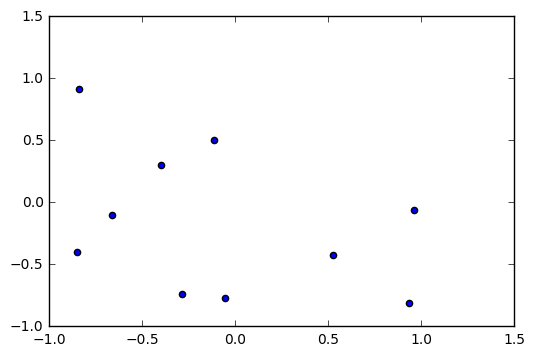

In [8]:
x_norm = init_board(10)
plt.scatter(x_norm[:, 0], x_norm[:, 1])


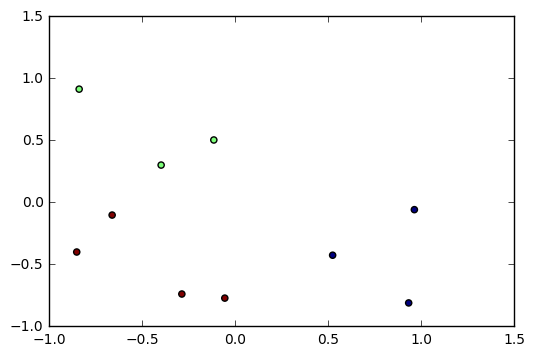

In [9]:
tester_norm=KMeans(n_clusters=3)
tester_norm.fit(x_norm)
labels_norm = tester_norm.labels_
plt.scatter(x_norm[:, 0], x_norm[:, 1], c=labels_norm.astype(np.float))

In [10]:
print tester_norm.labels_

[2 0 1 1 0 2 2 1 0 2]


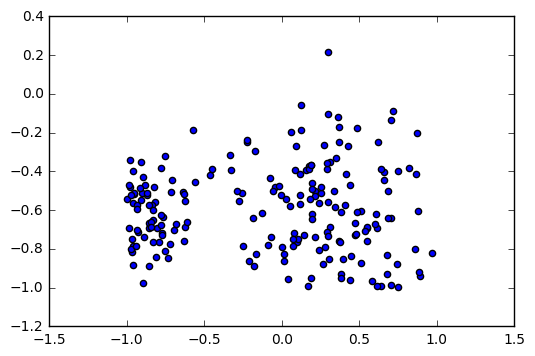

In [11]:
x_gauss = init_board_gauss(N=200, k=3)
plt.scatter(x_gauss[:, 0], x_gauss[:, 1])


{'blue': 78, 'green': 122}

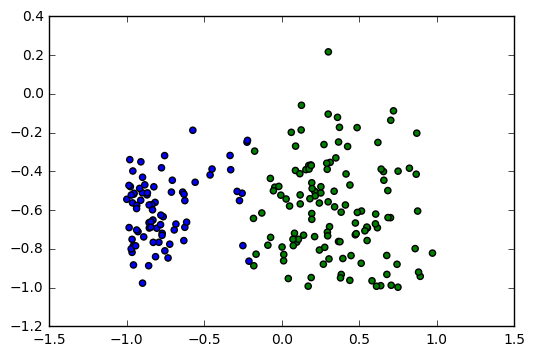

In [146]:
def k_cluster( data, n= 2, dates = None):
    tester=KMeans(n_clusters=n)
    tester.fit(data)
    labels = tester.labels_.tolist()
    
    counts = {color_list[x]: labels.count(x) for x in range(n)}
    
    colors = [color_list[x] for x in labels]
    if dates is not None:
        plt.scatter(dates, data[:, 1], c=colors)
        plt.gcf().autofmt_xdate()
    else:
        plt.scatter(data[:, 0], data[:, 1], c=colors)
    return counts
k_cluster(x_gauss)

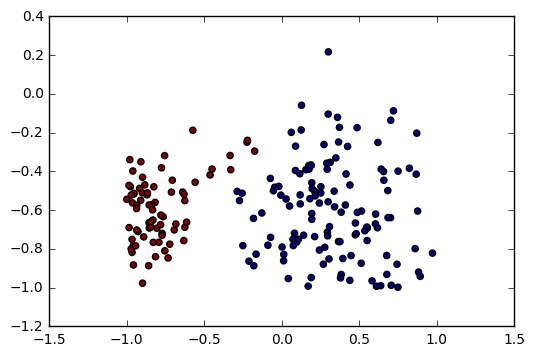

In [60]:
def agg_cluster (data,dates = None,  affinity = "euclidean", linkage = "complete", n = 2):
    # Affinity = {“euclidean”, “l1”, “l2”, “manhattan”,
    # “cosine”}
    # Linkage = {“ward”, “complete”, “average”}
    Hclustering = AgglomerativeClustering(n_clusters=n, affinity=affinity, linkage=linkage)
    Hclustering.fit(data)
    labels = Hclustering.labels_
    if dates is not None:
        plt.scatter(dates, data[:, 1], c=labels.astype(np.float))
        plt.gcf().autofmt_xdate()
    else: 
        plt.scatter(data[:, 0], data[:, 1], c=labels.astype(np.float))
agg_cluster(x_gauss, affinity="manhattan" )

In [90]:
# Kx = tester_gauss.cluster_centers_
# Kx_mapping = {case:cluster for case, cluster in enumerate(tester_gauss.labels_)}
# Hclustering = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
# Hclustering.fit(Kx)

# labels_gauss = Hclustering.labels_
# print labels_gauss
# # plt.scatter(x_gauss[:, 0], x_gauss[:, 1], c=labels_gauss.astype(np.float))

In [108]:

import numpy as np
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

def test_clusters(data, dates = None):

    fig, axes23 = plt.subplots(2, 3)

    for method, axes in zip(['single', 'complete'], axes23):
        
        z = hac.linkage(data, method=method)
        
        # Plotting
        axes[0].plot(range(1, len(z)+1), z[::-1, 2])
        knee = np.diff(z[::-1, 2], 2)
        axes[0].plot(range(2, len(z)), knee)

        num_clust1 = knee.argmax() + 2
        knee[knee.argmax()] = 0
        num_clust2 = knee.argmax() + 2

        axes[0].text(num_clust1, z[::-1, 2][num_clust1-1], 'possible\n<- elbow point')

        part1 = hac.fcluster(z, num_clust1, 'maxclust')
#         print part1
        part2 = hac.fcluster(z, num_clust2, 'maxclust')


        clr = ['#2200CC' ,'#D9007E' ,'#FF6600' ,'#FFCC00' ,'#ACE600' ,'#0099CC' ,
        '#8900CC' ,'#FF0000' ,'#FF9900' ,'#FFFF00' ,'#00CC01' ,'#0055CC']
        
        for part, ax in zip([part1, part2], axes[1:]):
            if dates is not None:
                ax.scatter(dates, data[:, 1], c = part)
                plt.gcf().autofmt_xdate()
            else:
                ax.scatter(data[:, 0], data[:, 1], c = part)
            
#             for cluster in set(part):
#                   ax.scatter(data[part == cluster, 0], data[part == cluster, 1], 
#                            color=clr[cluster])

        m = '\n(method: {})'.format(method)
        plt.setp(axes[0], title='Screeplot{}'.format(m), xlabel='partition',
                 ylabel='{}\ncluster distance'.format(m))
        plt.setp(axes[1], title='{} Clusters'.format(num_clust1))
        plt.setp(axes[2], title='{} Clusters'.format(num_clust2))

    plt.tight_layout()
    plt.show()

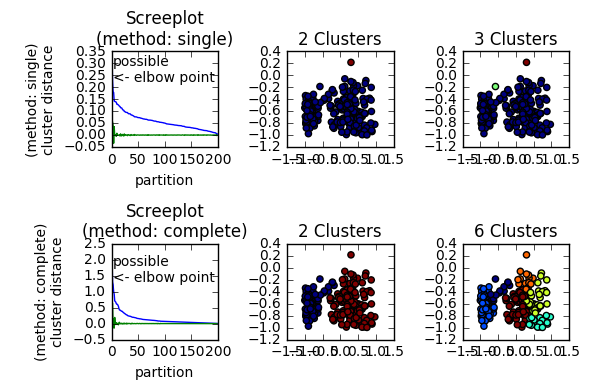

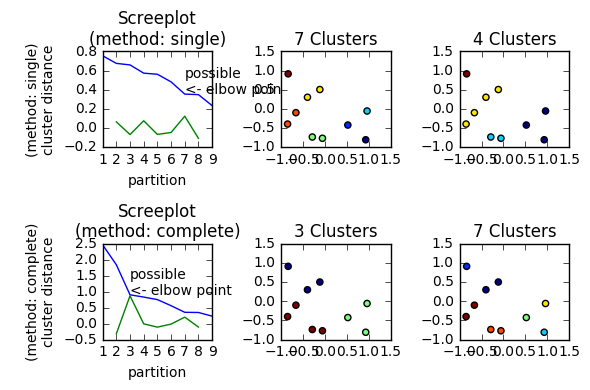

In [89]:
test_clusters(x_gauss)
test_clusters(x_norm)

In [197]:
start_date = datetime.datetime(1920,01,01)
end_date = datetime.datetime.now()
funun=pd.read_csv("test.csv", parse_dates = ["Date", "DOB"])
mask = (funun['DOB'] > start_date) & (funun['DOB'] <= end_date)
funun = funun.loc[mask]
funun.sample(n=5)

,Unnamed: 0,FName,LName,City,DOB,Platform,Title,Date,Decade,Year,used,new,SoldNew,DayOfWeek
126726,186373,Jen,Wren,Logan,1975-02-14,Playstation 2,ATV Off Road Fury,2012-04-02 16:10:31,1970.0,1975.0,5.99,9.99,False,Friday
86917,130223,Christine,Goodwin,Logan,1967-09-26,Nintendo DS,Ping Pals,2009-08-04 15:41:50,1960.0,1967.0,9.99,19.99,False,Tuesday
54933,78956,Robert,Deutsch,Logan,1985-01-27,Nintendo,Contra,2008-12-08 19:40:21,1980.0,1985.0,49.99,0.00,False,Sunday
324821,460007,Andrew,Vanover,Logan,1979-07-10,X-Box 360,NBA 2K8,2008-06-02 05:29:48,1970.0,1979.0,9.99,19.99,False,Tuesday
275565,393605,Susan,House,Garden City,1971-09-03,X-box,"Hobbit,The",2006-04-07 13:51:43,1970.0,1971.0,9.99,19.99,False,Friday


In [198]:
funun.Platform.unique()

array(['Amiibo', 'Board Games', 'Cards', 'Disney Infinity', 'DVD',
       'Game Cube', 'Gameboy', 'Gameboy Advance', 'Hyperkin', 'Nintendo',
       'Nintendo 3DS', 'Nintendo 64', 'Nintendo DS', 'Other',
       'Playstation', 'Playstation 2', 'Playstation 3', 'Playstation 4',
       'Pop! Toys', 'PSP', 'Sega Genesis', 'Skylanders', 'Super Nintendo',
       'Toys', 'WII', 'Wii U', 'X-box', 'X-Box 360', 'Xbox One', 'Yobo'], dtype=object)

In [201]:
p1 = funun[funun["Platform"] == "Nintendo"]
# p2= pd.concat([p1['DOB'].astype(np.int64), p1['used']], axis =1)
p2= pd.concat([p1['DayOfWeek'], p1['used']], axis =1)
lst=np.array([x for x in p2.values])
dates = None#p1["DOB"].astype(datetime.datetime).tolist()



In [188]:
# # make up some data
# # plot
# val = p1["DOB"].astype(datetime.datetime).tolist()
# print dir(val)
# print dir(val[0])
# plt.scatter(val, lst[:,1])
# # beautify the x-labels
# plt.gcf().autofmt_xdate()

# plt.show()

ValueError: could not convert string to float: Sunday

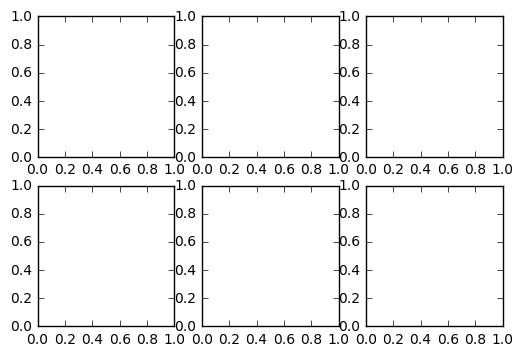

In [202]:
test_clusters(lst,dates= dates)


In [203]:
print k_cluster(lst, n = 5, dates=dates)
plt.title("X-box 360")
plt.xlabel("Year born")
plt.ylabel("Value")

ValueError: could not convert string to float: Sunday

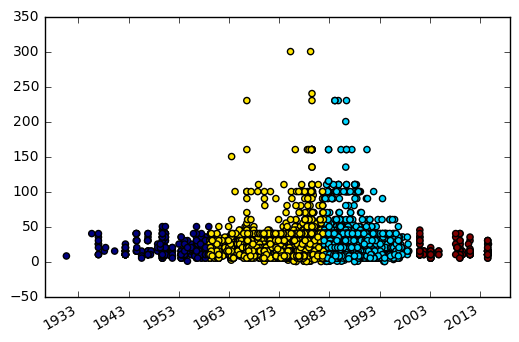

In [191]:
agg_cluster(data=lst, n=4, dates=dates)